In [202]:
import pandas as pd
import matplotlib.pyplot as plt


def plot_simulation(df: pd.DataFrame):
  # Create a figure with multiple subplots
  fig, axs = plt.subplots(6, 1, figsize=(14, 20), sharex=True)
  plt.style.use('default')
  #{'mpl20': 'default', 'mpl15': 'classic'}

  # Plot Bid, Ask, and Price
  axs[0].plot(df.index, df['Bid'], label='Bid', color='blue', linewidth=1)
  axs[0].plot(df.index, df['Ask'], label='Ask', color='red', linewidth=1)
  axs[0].plot(df.index, df['Price'], label='Price', color='black', linewidth=1)
  axs[0].set_ylabel('Price')
  axs[0].set_title('Bid, Ask, and Price')
  axs[0].legend()
  axs[0].grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
  axs[0].set_xlabel('Time')


  # Plot Cash and Inventory
  axs[1].plot(df.index, df['Cash'], label='Cash', color='green', linewidth=1)
  axs[1].set_ylabel('Cash')
  ax2 = axs[1].twinx()
  ax2.plot(df.index, df['Inventory'], label='Inventory', color='orange', linewidth=1)
  ax2.set_ylabel('Inventory')
  axs[1].set_title('Cash and Inventory')
  axs[1].legend(loc='upper left')
  ax2.legend(loc='upper right')
  axs[1].grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
  axs[1].set_xlabel('Time')


  # Plot Spread and Skew
  axs[2].plot(df.index, df['Spread'], label='Spread', color='red', linewidth=1)
  ax4 = axs[2].twinx()
  ax4.plot(df.index, df['Skew'], label='Skew', color='blue', linewidth=1)
  axs[2].set_ylabel('Spread')
  ax4.set_ylabel('Skew')
  axs[2].set_title('Spread and Skew')
  axs[2].legend(loc='upper left')
  ax4.legend(loc='upper right')
  axs[2].grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
  axs[2].set_xlabel('Time')

  # Plot PnL
  axs[3].plot(df.index, df['PnL'], label='PnL', color='purple', linewidth=1)
  axs[3].set_ylabel('PnL')
  axs[3].set_title('PnL')
  axs[3].legend()
  axs[3].grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
  axs[3].set_xlabel('Time')

  # Plot Noise, Informed
  axs[4].plot(df.index, df['Noise Trades'], label='Noise Trades', color='Orange', linewidth=1)
  axs[4].plot(df.index, df['Informed Trades'], label='Informed Trades', color='Red', linewidth=1)
  axs[4].set_ylabel('Cumulative Traders')
  axs[4].set_title('Noise and Informed Traders')
  axs[4].legend()
  axs[4].grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
  axs[4].set_xlabel('Time')


  # Plot Volume Imbalance
  axs[5].plot(df.index, df['Trade Imbalance'], label='Volume Imbalance', color='blue', linewidth=1)
  axs[5].set_ylabel('Volume')
  axs[5].set_title('Volume Imbalance')
  axs[5].legend()
  axs[5].grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
  axs[5].set_xlabel('Time')


  # Adjust layout
  plt.tight_layout()
  plt.show()

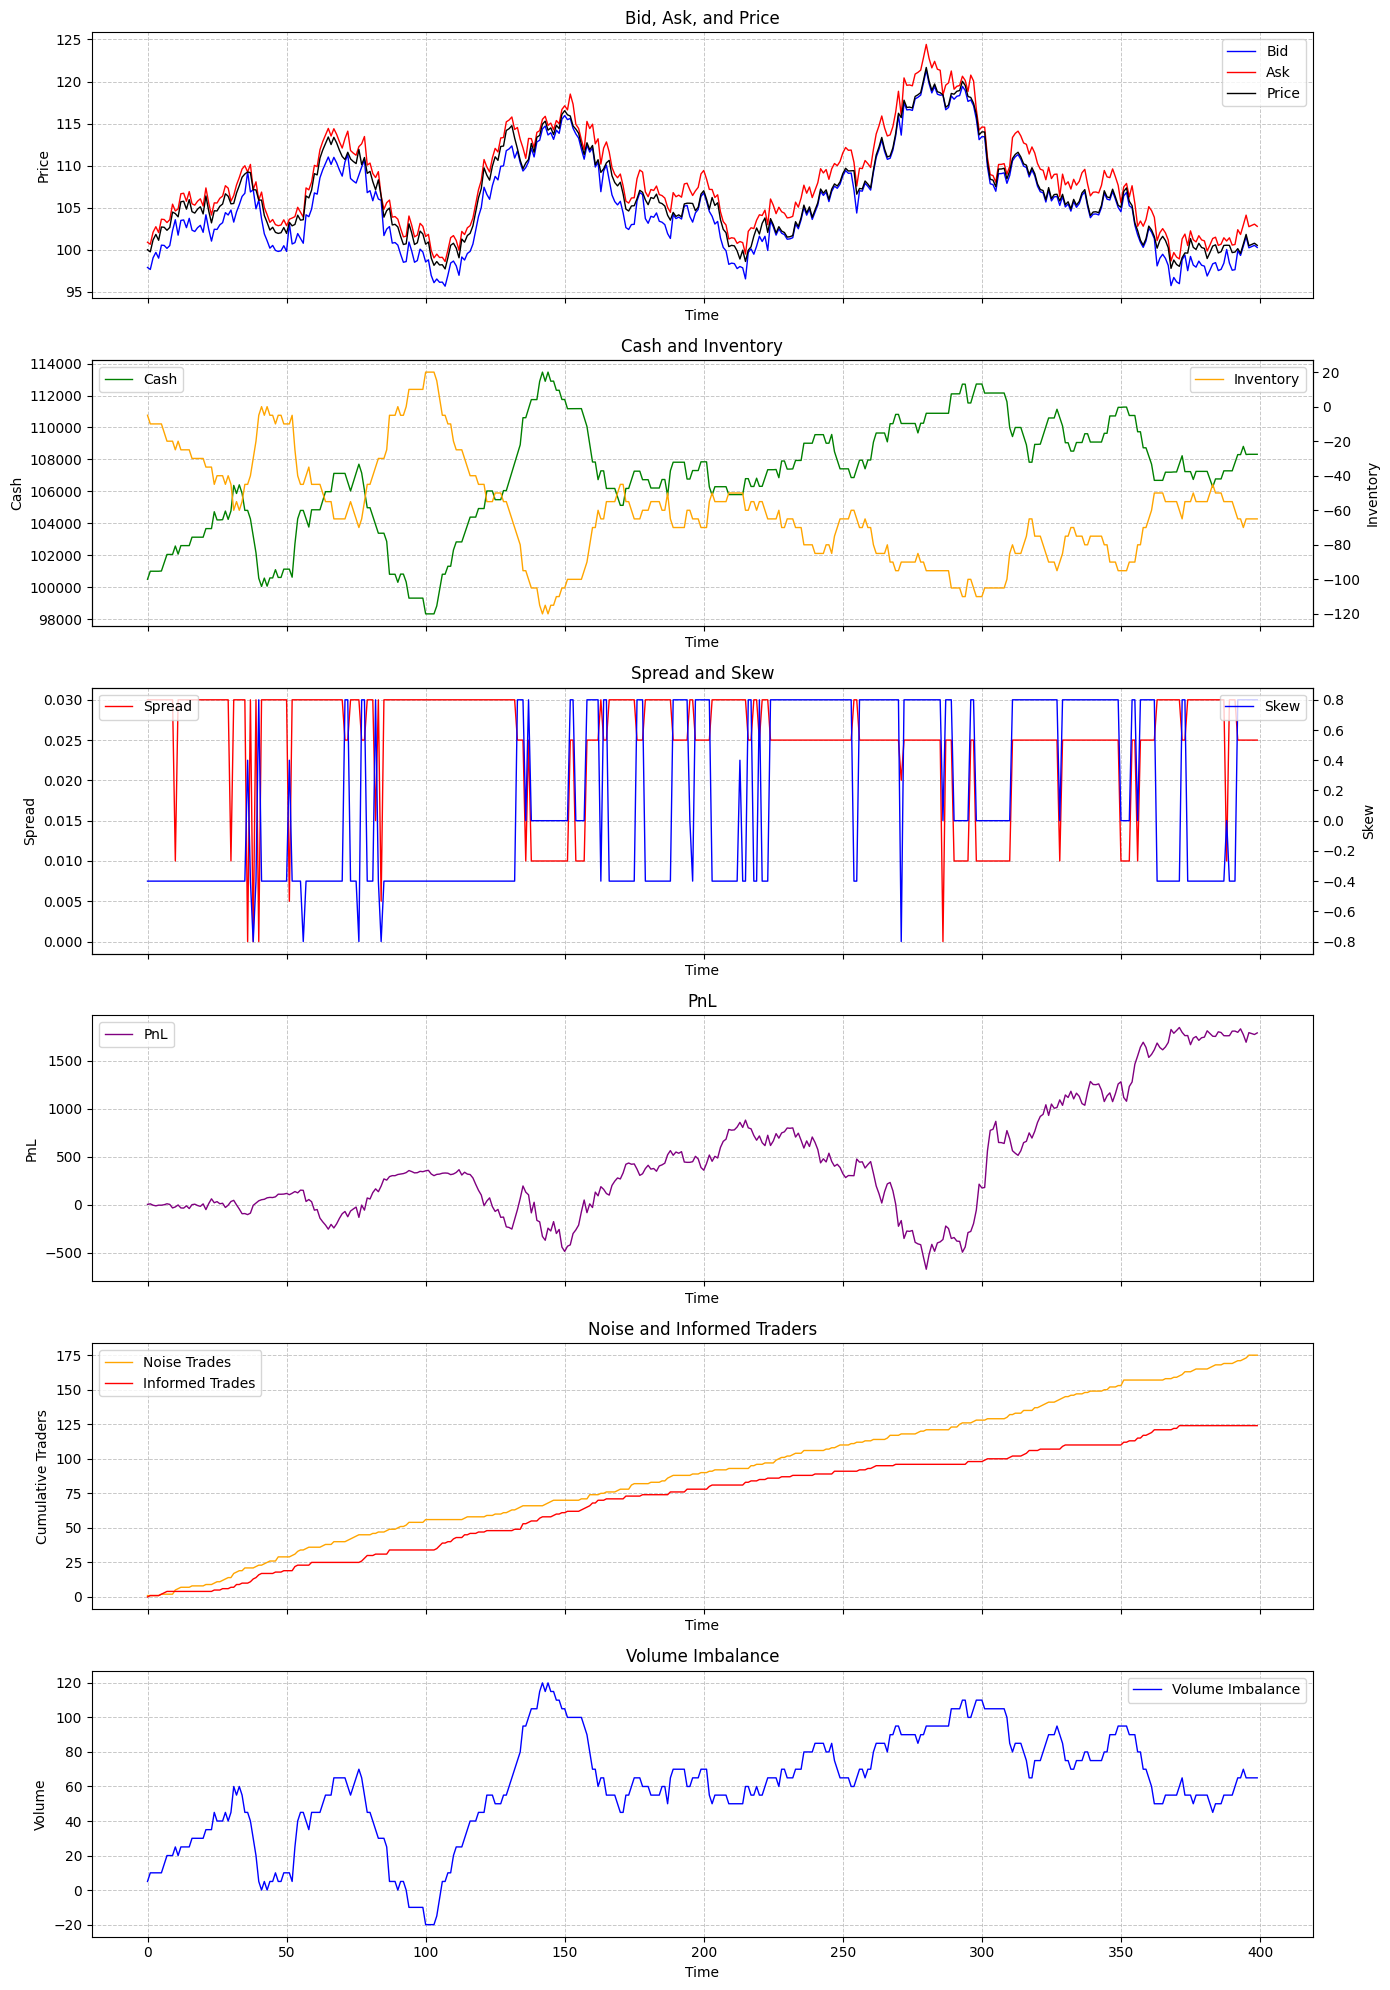

In [210]:

# Load the data
df = pd.read_csv('../data/DQN/liquid/market_sim_render.csv')
plot_simulation(df)


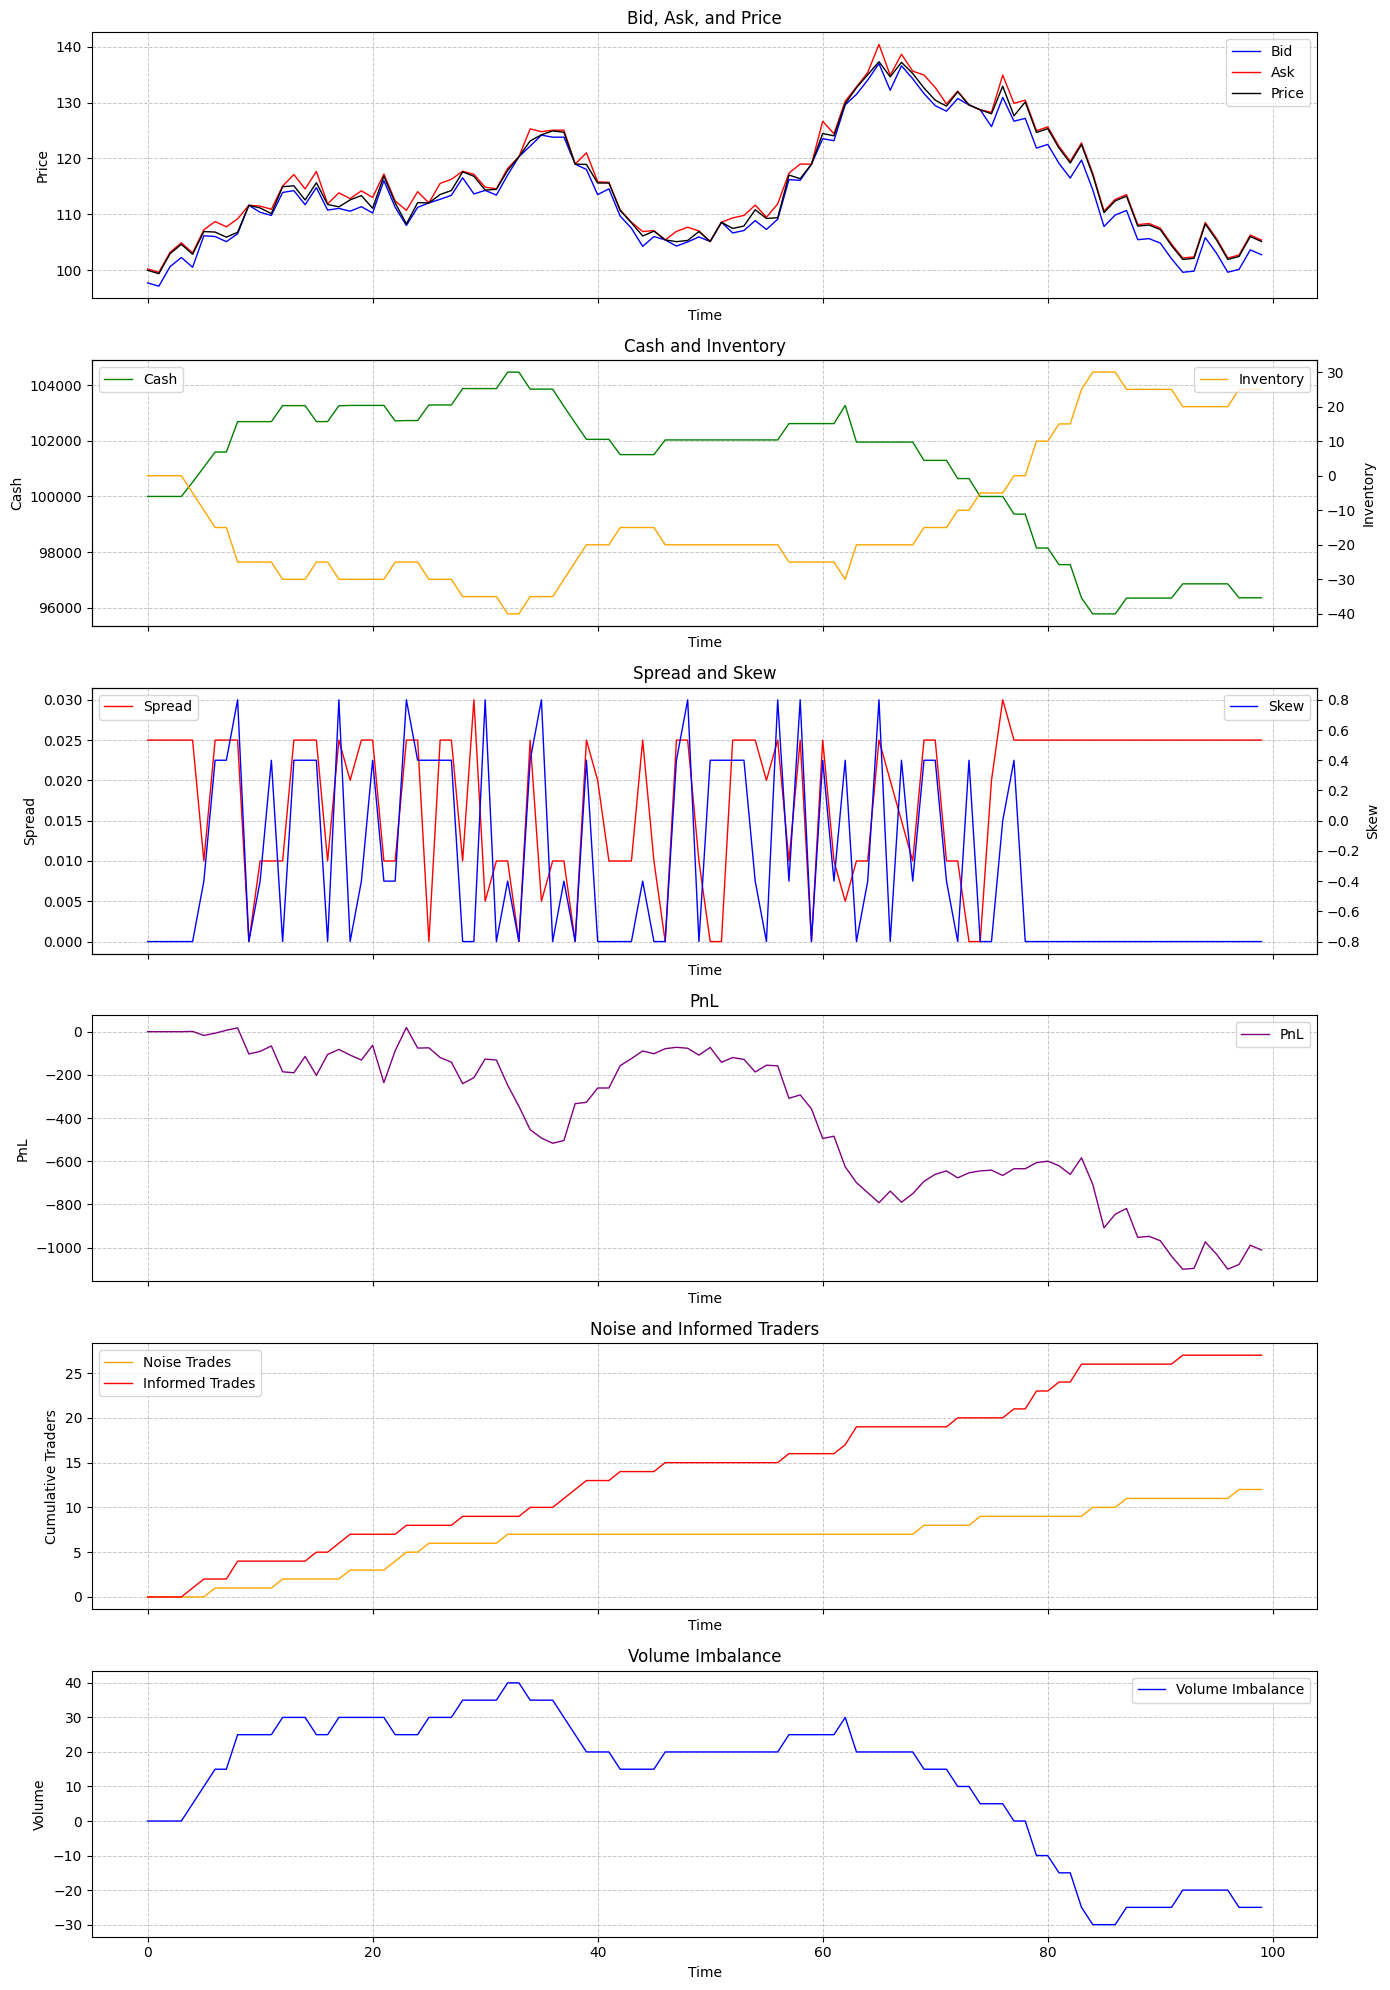

In [211]:

# Load the data
df = pd.read_csv('../data/A2C/illiquid/itp/1/market_sim_render.csv')
plot_simulation(df)


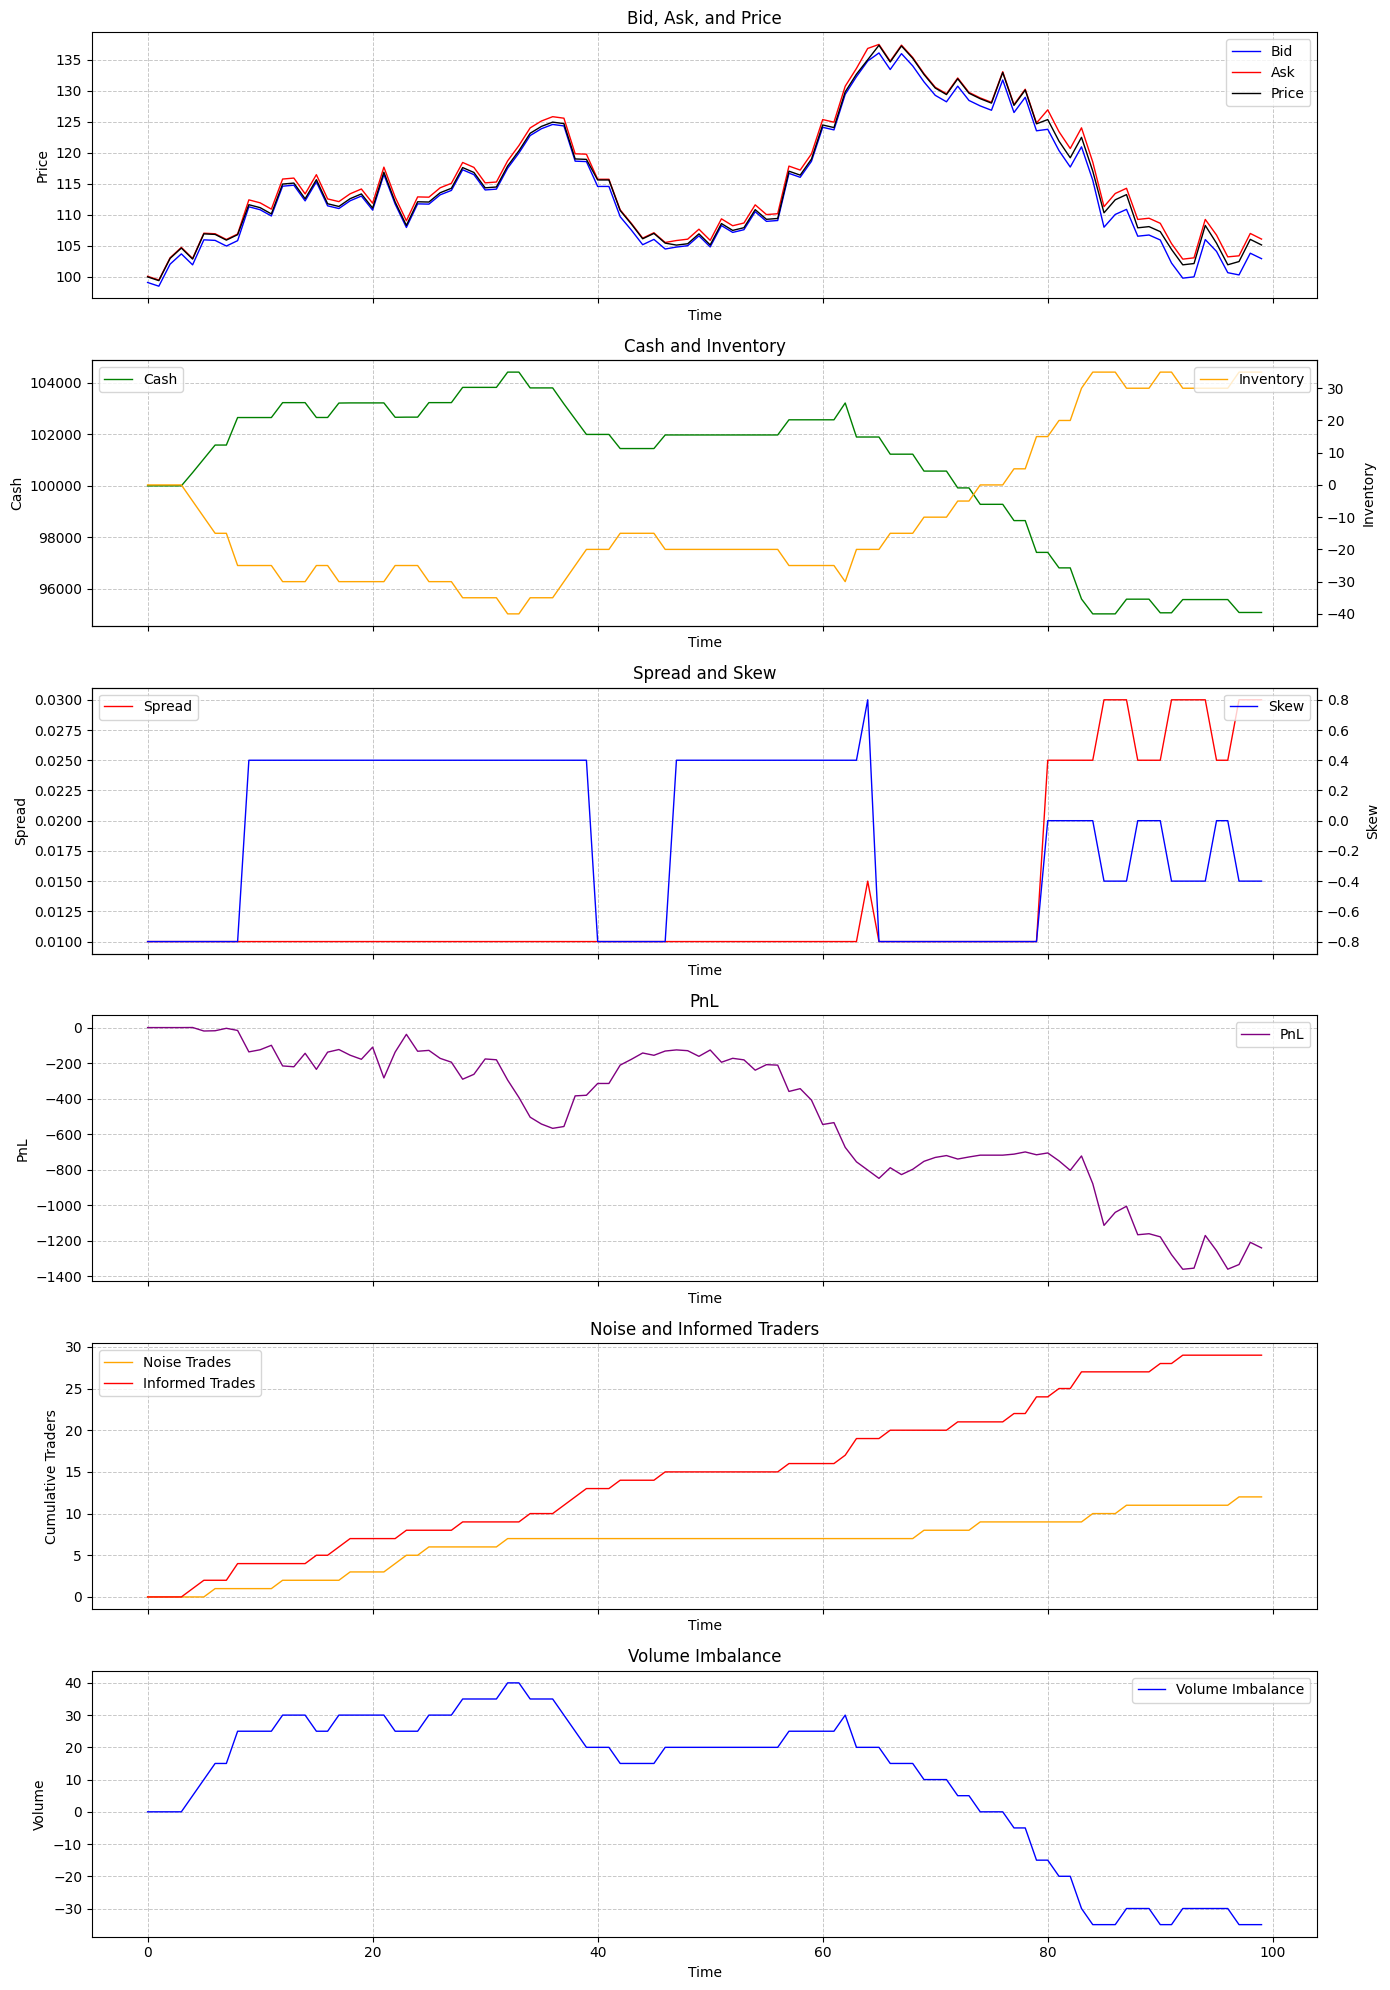

In [205]:

# Load the data
df = pd.read_csv('../data/DQN/illiquid/itp/1/market_sim_render.csv')

plot_simulation(df)


In [206]:
df = pd.read_csv('../data/A2C/liquid/itp/1/market_sim_render.csv')
df1 = pd.read_csv('../data/DQN/illiquid/itp/1/market_sim_render.csv')

correlation_ab = df['Skew'].corr(df['Trade Imbalance'])
correlation_ab1 = df1['Skew'].corr(df1['Trade Imbalance'])
print(f'Liquid model Correlation: {correlation_ab}')
print(f'Illiquid model Correlation: {correlation_ab1}')

Liquid model Correlation: 0.09830883918438177
Illiquid model Correlation: 0.44268246153716934


# Mean absolute position


In [207]:
import pandas as pd

df = pd.read_csv('../data/PPO/illiquid/itp/1/market_sim_render.csv')

map_value = df['Inventory'].abs().mean()

value =  df['PnL'].iloc[-1] / map_value

print('PnL: ' + str(df['PnL'].iloc[-1]))
print('MAP: ' + str(map_value))
print('Performance: ' + str(value))
print('Average Spread: ' + str(df['Spread'].mean()))
print('Average Skew: ' + str(df['Skew'].mean()))
print('Noise Trades: ' + str(df['Noise Trades'].iloc[-1]))
print('Informed Trades: ' + str(df['Informed Trades'].iloc[-1]))


PnL: -1282.1066495269188
MAP: 21.75
Performance: -58.947432162157185
Average Spread: 0.015099999999999997
Average Skew: 0.007999999999999997
Noise Trades: 12
Informed Trades: 29
